<a href="https://colab.research.google.com/github/diem-ai/datascience-projects/blob/master/stock_analysis/sharp_ratio_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Description

In this notebook, we look in-depth at model-free factor analysis using PCA to struture porfolio return of 20 stocks without replying on any factors such as value or momentume .


We work with S&P 500 index stock data that is collected from https://www.alphavantage.co in 5 years

**Google Colab Setup**

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# To add a directory with your code into a list of directories 
# which will be searched for packages
sys.path.append('/content/drive/My Drive/Colab Notebooks')

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Import Library**

In [0]:
import pandas as pd
import time
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns


### Data Collection

In [0]:
'''
def get_data_from_alphavantage(url):
    """
    download historial stock data from alphadvantage.com
    return data frame with date as index
    """
    
    df =pd.read_csv(url)
    #print(df.head())
    df = df.set_index(['timestamp'])
    #rename index column from timestame to Date
    df.index.names = ['Date']
    return df.sort_index(ascending = True)
'''

def get_raw_data(ticker):
    """Return pandas dataframe given ticker symbol.
       dataframe has 8 columns: open, high, low, close, adjusted_close, volume and split_coefficient
    """
    query =  "https://www.alphavantage.co/query?"
    function = "function=TIME_SERIES_DAILY"
    symbol = "symbol=" + ticker
    key = "apikey=6PI9I1HMXX921ZEP"
    dtype =  "datatype=csv"
    size = "outputsize=full"
    
    url = query + "&" + function + "&" + symbol + "&" + key + "&" + dtype + "&" + size
    print(url)
    
    df =pd.read_csv(url)
    #print(df.head())
    df = df.set_index(['timestamp'])
    #rename index column from timestame to Date
    df.index.names = ['Date']
        
    return df.sort_index(ascending = True)

def get_data(tickers, start_date, end_date):
  
  dates = pd.date_range(start_date, end_date)
  df = pd.DataFrame(index = dates)
  df.index.names = ["Date"]
  
  for ticker in tickers:


    try:
      df_temp = get_raw_data(ticker)
      #print(df_temp.head())
      #print(ticker)
      # select close column only and rename it
      df_temp = df_temp[['close']].rename(columns={'close': ticker})
      df = df.join(df_temp)
    except:
      print("Error while downloading: " + ticker)
            
  return df.dropna()


def get_date(delta):
  now = dt.datetime.now()

  start_date = (now - relativedelta(years=+ delta)).strftime("%Y-%m-%d")

  end_date = now.strftime("%Y-%m-%d")

  return start_date, end_date
  
  

  

In [124]:
tickers=["MSFT", "AAPL", "AMZN", "FB", "BRK.B"
         , "JPM", "JNJ", "XOM",  "YHOO", "MMM"
         , "ABT", "ALXN", "ALGN", "BAC", "BK"
         , "BA", "COG","DRE", "EBAY", "SPX"]

start, end = get_date(5)

'''
for sym in tickers:
  df = get_raw_data(sym)
  print(df.head())
'''
#s_idx = 5 # starting index

#e_idx = s_idx # ending index

asset_prices = get_data(tickers[:5], start, end)
time.sleep(60)

asset_prices = asset_prices.join(get_data(tickers[5: 10], start, end))
time.sleep(60)

asset_prices = asset_prices.join(get_data(tickers[10: 15], start, end))
time.sleep(60)

asset_prices = asset_prices.join(get_data(tickers[15: ], start, end))



https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=MSFT&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=AAPL&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=AMZN&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=FB&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=BRK.B&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=JPM&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=JNJ&apikey=6PI9I1HMXX921ZEP&datatype=csv&outputsize=full
https://www.alphavantage.co/query?&function=TIME_SERIES_DAILY&symbol=XOM&apikey=6PI9I1HMXX921ZEP&datatype=csv&outp

In [126]:
asset_prices.head()

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,JNJ,XOM,MMM,ABT,ALXN,ALGN,BAC,BK,BA,COG,DRE,EBAY,SPX
Date,,,,,,,,,,,,,,,,,,,
2014-08-25,45.170,101.540,334.02,75.020,136.23,59.34,103.23,98.75,144.70,42.49,170.56,55.22,16.29,39.47,128.33,33.49,18.40,55.49,1997.92
2014-08-26,45.005,100.889,341.83,75.960,136.25,59.74,103.44,99.64,144.60,42.80,172.27,56.61,16.33,39.33,128.60,33.28,18.35,56.25,2000.02
2014-08-27,44.870,102.130,343.18,74.630,136.52,59.59,103.22,99.53,143.94,42.60,169.17,55.50,16.20,39.17,128.20,32.91,18.34,55.92,2000.12
2014-08-28,44.880,102.250,340.02,73.855,136.11,59.16,102.95,99.57,143.98,42.35,168.31,54.79,16.01,39.00,127.11,33.37,18.35,55.43,1996.74
2014-08-29,45.430,102.500,339.04,74.820,137.25,59.45,103.73,99.46,144.00,42.24,169.29,54.46,16.09,39.18,126.80,33.54,18.60,55.50,2003.37


**Save stocks into csv file**

In [127]:
filepath = "/content/drive/My Drive/data"

#asset_prices.to_csv(filepath + "sp500_stocks.csv")

asset_prices = pd.read_csv(filepath + "sp500_stocks.csv")

asset_prices = asset_prices.set_index(['Date'])

asset_prices.head()

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,JNJ,XOM,MMM,ABT,ALXN,ALGN,BAC,BK,BA,COG,DRE,EBAY,SPX
Date,,,,,,,,,,,,,,,,,,,
2014-08-25,45.170,101.540,334.02,75.020,136.23,59.34,103.23,98.75,144.70,42.49,170.56,55.22,16.29,39.47,128.33,33.49,18.40,55.49,1997.92
2014-08-26,45.005,100.889,341.83,75.960,136.25,59.74,103.44,99.64,144.60,42.80,172.27,56.61,16.33,39.33,128.60,33.28,18.35,56.25,2000.02
2014-08-27,44.870,102.130,343.18,74.630,136.52,59.59,103.22,99.53,143.94,42.60,169.17,55.50,16.20,39.17,128.20,32.91,18.34,55.92,2000.12
2014-08-28,44.880,102.250,340.02,73.855,136.11,59.16,102.95,99.57,143.98,42.35,168.31,54.79,16.01,39.00,127.11,33.37,18.35,55.43,1996.74
2014-08-29,45.430,102.500,339.04,74.820,137.25,59.45,103.73,99.46,144.00,42.24,169.29,54.46,16.09,39.18,126.80,33.54,18.60,55.50,2003.37


get_data() will send request to data providers to query data with given stickers and given dates. The results will be stored in dataframe

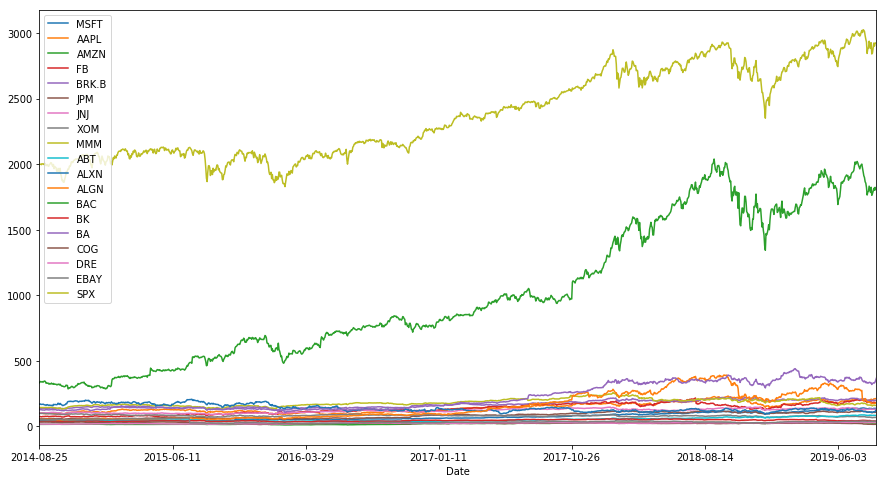

In [128]:
asset_prices.plot(figsize=(15, 8))

 **Cumulative Returns**: Plot cumulative returns to observe the total change in price over 5 years

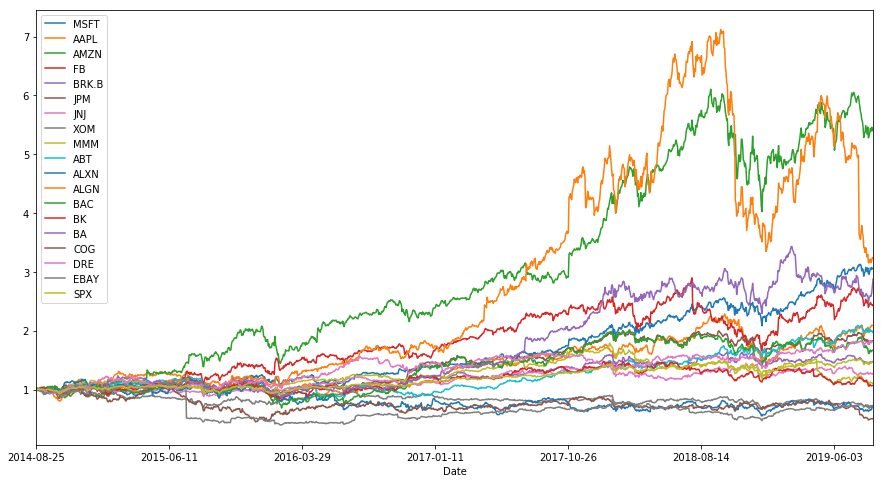

In [129]:
(asset_prices/asset_prices.iloc[0]).plot(figsize=(15, 8))

### Asset Returns Calculation & Standardization

- The first step is to calculate percent returns : 

```
(price(t) - price(t-1))/price(1)
```


- Then, standardizing percent returns so that all the variables will be transformed to the same scale.

```
(price - price.mean())/price.std()
```


In [0]:
def calculate_returns(stocks_prices):
    """
    - stock_prices: is a dataframe whose columns represent stock names and rows are date
    
    - return daily stocks returned after they are normalized
    
    """
    # Percentage of returns = (price(t) - price(t-1))/price(1)
    stock_returns = stocks_prices.pct_change().dropna()
    normalized_returns = (stock_returns - stock_returns.mean())/stock_returns.std()
    
    return stock_returns, normalized_returns

In [0]:
stock_returns, normalized_returns = calculate_returns(asset_prices)

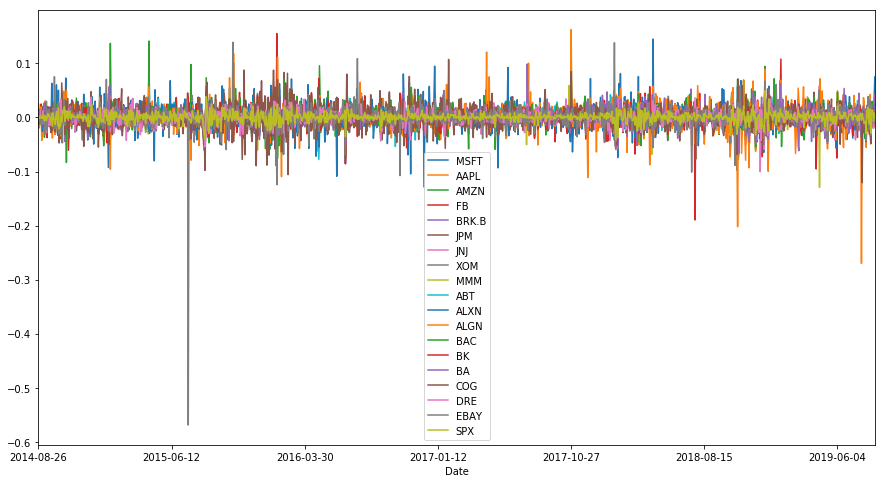

In [132]:
stock_returns.plot(figsize=(15, 8))

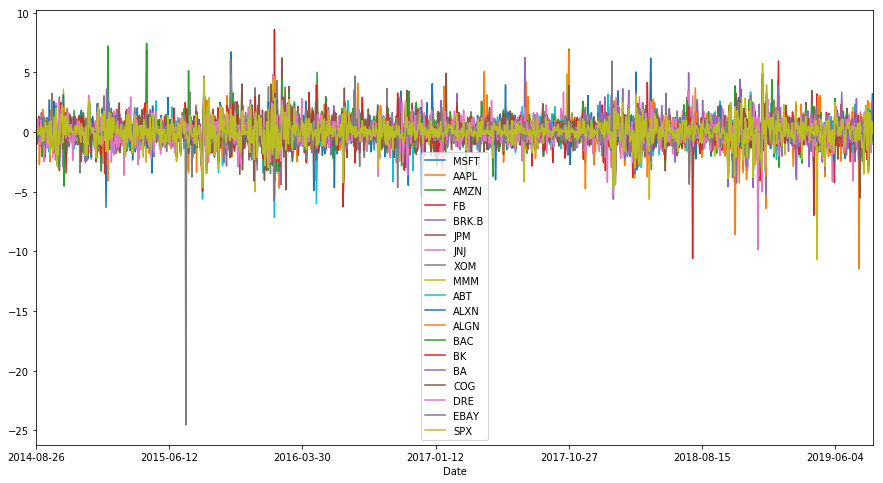

In [133]:
normalized_returns.plot(figsize=(15, 8))

**Cummulative of stock returns**

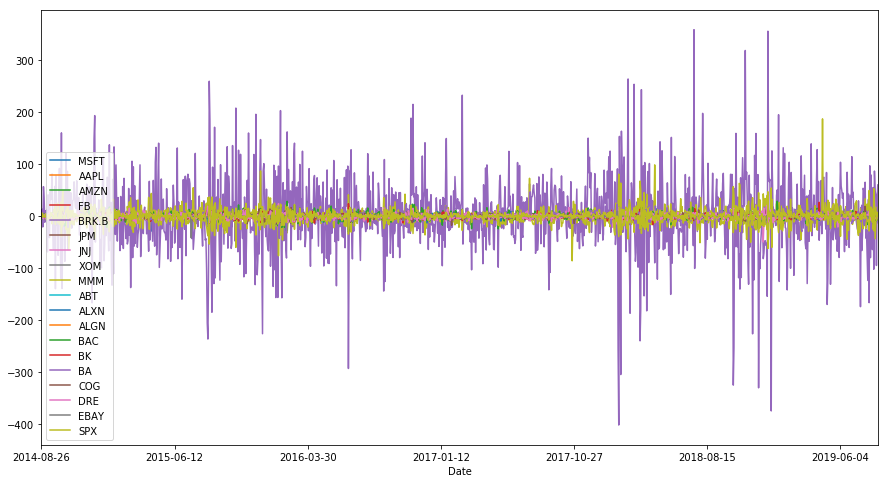

In [134]:
(stock_returns/stock_returns.iloc[0] -1).plot(figsize=(15, 8))

### Train/Test Split

- Normalized return stocks is splitted into 80% of data for train data and 20% for test

- Train set will be fitted to PCA in order to extract the variance from features

- Test set will be used to find the best eigen porfolio later

In [135]:
#Train/Test Split

train_size = int(len(normalized_returns) * 0.8)

train = normalized_returns[:train_size]
test = normalized_returns[train_size:]

train_raw = stock_returns[:train_size]
test_raw = stock_returns[train_size:]

print('Train dataset:', train.shape)
print('Test dataset:', test.shape)

Train dataset: (1006, 19)
Test dataset: (252, 19)


### PCA Fitting

???

In [136]:
# PCA Fitting
#Calculate covariance matrix using training data set, i.e. df_train for all assets. Assign results to cov_matrix.
#Calculate covariance matrix using training data set, i.e. df_raw_train for all assets. Assign results to cov_matrix_raw.
#Use scikit-learn PCA to fit PCA model to cov_matrix. Assign fitted model to pca
from sklearn.decomposition import PCA
import numpy as np

# Taking out SPX
stock_tickers = stock_returns.columns.values[:-1]

cov_matrix = train[stock_tickers].cov()

pca = PCA()


pca.fit_transform(cov_matrix)

var_threshold = 0.9
# Calculate the cummulative of explained variance ratio of all PCA Components
var_explained_cum = np.cumsum(pca.explained_variance_ratio_)

n_comp = np.where(np.logical_not(var_explained_cum < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
print('%d components explain %.2f%% of variance' %(n_comp, 100* var_threshold))

9 components explain 90.00% of variance


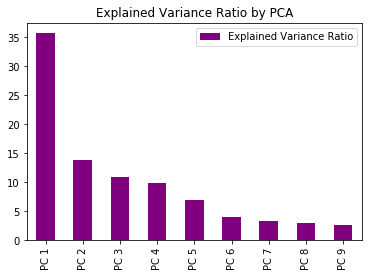

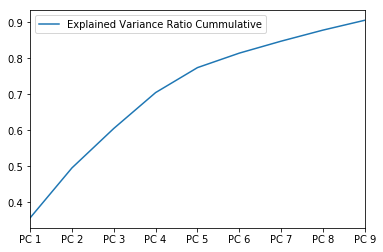

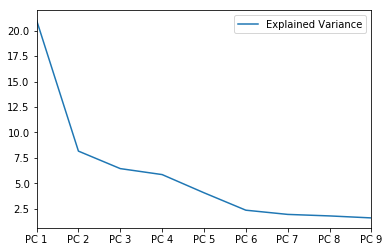

In [137]:
# Plot PCA explained variances ratio

index = ['PC {}'.format(ix+1) for ix in range(n_comp)]
df_var_explained_ratio = pd.DataFrame({"Explained Variance Ratio": pca.explained_variance_ratio_[:n_comp]*100}
                                      , index = index)

# Create a bar plot visualization

df_var_explained_ratio.plot(kind="bar"
                            , color="purple"
                            , title="Explained Variance Ratio by PCA")

df_var_explained_cum = pd.DataFrame({"Explained Variance Ratio Cummulative": var_explained_cum[:n_comp]}
                                    , index = index)
df_var_explained_cum.plot()



df_var_explained = pd.DataFrame({"Explained Variance": pca.explained_variance_[:n_comp]*100}
                                      , index = index)

df_var_explained.plot()

**Observation**: As you we can see, the very first bar represented in the first principal component is the highest one. Taken alone, it explains about 38% of the total variance of the stock returns in the index. The rest of eigenvalues are much smaller than the first one, and explain much smaller fraction of the total variance.


**Feature Space**: Plot feature space in dataframe whose columns are tickers and rows are component's variance

In [138]:
df_tmp = pd.DataFrame(data = pca.components_
             , columns=stock_tickers
             , index = ["PC{}".format(i+1) for i in range(pca.n_components_) ])


df_tmp

,MSFT,AAPL,AMZN,FB,BRK.B,JPM,JNJ,XOM,MMM,ABT,ALXN,ALGN,BAC,BK,BA,COG,DRE,EBAY
PC1,0.074179,0.038500,-0.062591,-0.042813,0.378238,0.480379,0.153899,0.212033,0.178130,0.194466,0.051179,-0.043721,0.475433,0.444749,0.208644,-0.023367,-0.021527,-0.048330
PC2,-0.331618,-0.266429,-0.416198,-0.450740,-0.010532,0.009104,-0.058601,0.275536,-0.036283,-0.056777,-0.161840,-0.211688,-0.008772,-0.009081,-0.049570,0.450546,0.048000,0.282230
PC3,-0.018199,-0.030192,-0.052481,-0.110485,-0.041417,0.040974,-0.034445,-0.257934,-0.079754,0.084768,0.070694,-0.019996,0.064698,0.051411,0.054070,-0.470074,-0.246796,0.775958
PC4,-0.025372,-0.059182,-0.228370,-0.200319,0.106210,-0.180959,0.437691,0.070977,0.261569,0.318898,0.113080,0.050380,-0.288106,-0.139582,0.159225,-0.339773,0.482630,-0.035733
PC5,-0.192974,-0.148535,-0.201233,-0.101377,-0.114797,0.011401,0.043584,-0.227552,-0.099123,0.216470,0.771675,0.093204,0.043957,0.019830,-0.101472,0.129279,-0.282586,-0.229990
PC6,-0.284353,0.024724,-0.119507,0.018232,-0.042110,0.087760,-0.449184,-0.219970,-0.204472,-0.253367,0.150383,-0.152756,0.182168,0.116056,0.178621,-0.242165,0.584055,-0.118377
PC7,0.164886,0.036312,-0.199165,-0.274363,-0.022135,0.028676,-0.134967,-0.492829,-0.025541,0.249111,-0.349467,0.579440,0.101409,0.107353,-0.055579,0.174588,0.113592,-0.072632
PC8,-0.285955,0.275859,-0.315387,-0.024296,-0.026766,-0.081828,-0.087306,0.025129,0.232798,-0.219864,-0.133531,0.159667,-0.074749,-0.095563,0.567203,-0.141442,-0.429766,-0.198502
PC9,0.316162,0.766273,-0.152886,-0.236046,0.001690,-0.013529,-0.229352,0.205086,-0.070934,0.121582,0.236212,-0.105813,-0.062843,-0.097616,-0.095041,0.105623,0.074832,0.113374
PC10,0.059896,-0.115753,0.566704,-0.411583,-0.053712,-0.087235,-0.226379,-0.117667,0.075219,0.283935,0.033984,-0.243650,-0.104594,0.019764,0.481326,0.154160,-0.033364,-0.046808


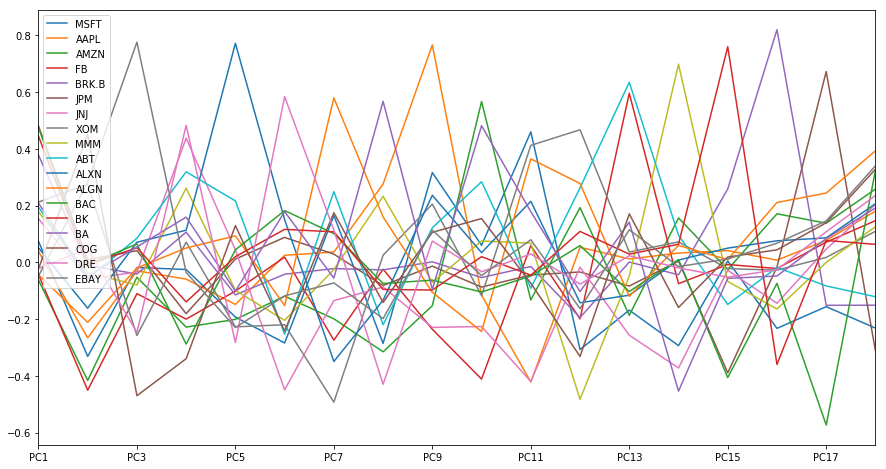

In [139]:
df_tmp.plot(figsize=(15, 8))

**Important Features**: Find the feature whose variance is the highest in each pca components

In [140]:
import numpy as np

n_pcs = pca.components_.shape[0]

important_idx = [np.argmax(pca.components_[i]) for i in range(n_pcs)]

important_features = [stock_tickers[important_idx[i]] for i in range(n_pcs)]

pd.DataFrame({"PC {}".format(i+1): [important_features[i]] for i in range(n_pcs)}, index = ["Important Feature"]).T

,Important Feature
PC 1,JPM
PC 2,COG
PC 3,EBAY
PC 4,DRE
PC 5,ALXN
PC 6,DRE
PC 7,ALGN
PC 8,BA
PC 9,AAPL
PC 10,AMZN


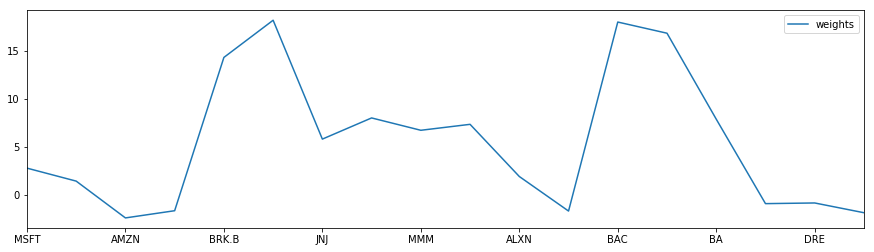

In [141]:
pcs = pca.components_

idx = 0 # first component

pc_w = pcs[idx, : ]/sum(pcs[idx, :])

eigen_prtf = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}
                          , index = stock_tickers)

eigen_prtf.plot(figsize=(15, 4))

In [142]:
eigen_prtf

,weights
MSFT,2.801867
AAPL,1.454195
AMZN,-2.364158
FB,-1.617128
BRK.B,14.286703
JPM,18.144775
JNJ,5.813027
XOM,8.008861
MMM,6.728281
ABT,7.345330


### Compute performance of eigen portfolios

- Porfolio is characteristic by tuple (anual returns, anual volatility , anual sharp-ratio)
- Implement eigen_porfolio_return(): Compute the eigen weight of each porfolio. The weight is derived from PCA.components
- Implement sharpe_ratio() function. The function takes ts_returns argument of type pd.Series and returns a tuple of annualized return, annualized vol, and annualized sharpe ratio, where sharpe ratio is defined as annualized return divided by annualized volatility
- Find portfolio (an index into sharpe_metric) that has the highest sharpe ratio

In [0]:
#Eigen-portfolios construction

# Calculate anual return, volality and sharp-ratio of stock
def sharpe_ratio(eigen_prtf_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio, 
                    where sharpe ratio is defined as annualized return divided by annualized volatility 
                    
    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio
    
    Return:
    a tuple of three : annualized return, volatility, and sharpe ratio
    """
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.
    
    # compute the number of years from given period 252 which is the number of business days per year
    # take the number of porfolio and divide to given period
    n_years = len(eigen_prtf_returns)/periods_per_year
    
    # Cummulative returns
    annualized_return = np.power(np.prod(1 + eigen_prtf_returns), (1/n_years) )-1
    
    annualized_vol = eigen_prtf_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe
  
  
# Find the eigen porfolio from pca components
def eigen_porfolio_return(idx, pca, stock_tickers):
    """
    - @idx: index of pca components (idx th PCA components)
    - @pca: PCA()
    - @stock_tickers: is an array - a list of stock name
    - return a pandas frame whose data is weight of stock derived from idx th PCA components
    
    """
    pcs = pca.components_
    # Normalize porfolio to 1
    # Porfolio's weights is an array
    pc_w = pcs[:, idx ]/sum(pcs[:, idx])
    
    eigen_prtf = pd.DataFrame(data ={'weights': pc_w}
                              , index = stock_tickers)
    
    
    eigen_prtf.sort_values(by=['weights']
                           , ascending=False
                           , inplace=True)
    return eigen_prtf
    

# Find the highest sharp-ratio of vector eigens
def optimize_porfolio(pca, cov_matrix, stock_tickers, stock_return_data):
    """
    pca: Principal Components after fitting data
    cov_matrix: covariance matrix of normalized stock returns
    stock_tickers: an array of stock names
    stock_return_data: an asset prices dataframe whose columns are stock names and rows are time
    
    """
    pcs = pca.components_
    
    #n_portfolios = len(stock_tickers)
    n_portfolios = len(pcs) 
    
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    
    
    
   # n_portfolios = len(pcs)
    for ix in range(n_portfolios):
        
        # extract eigen value of features in each pca components 
        eigen_prtf = eigen_porfolio_return(ix, pca, stock_tickers)
        
#       eigen_prtf_returns = np.dot(df_raw_test.loc[:, eigen_prtf.index], eigen_prtf / 100)
        
        # Multiply stocks (stock_return_data) with their eigen portfolio (eigen_prtf)  in corresponding
        eigen_prtf_returns = np.dot(stock_return_data[stock_tickers], eigen_prtf)
  
        eigen_prtf_returns = pd.Series(eigen_prtf_returns.squeeze()
                                       , index=stock_return_data.index)
        
        eigen_prtf_returns = eigen_prtf_returns.dropna()
        
        ret, vol, sharpe = sharpe_ratio(eigen_prtf_returns)

        
        annualized_ret[ix] = ret
        sharpe_metric[ix] = sharpe 
        annualized_vol[ix] = vol
    

    
    return annualized_ret, annualized_vol, sharpe_metric

In [144]:
cov_matrix = train[stock_tickers].cov()


annualized_ret, annualized_vol, sharpe_metric = optimize_porfolio(pca
                                                                  , cov_matrix
                                                                  , stock_tickers
                                                                  , test_raw)


# Return the index of max value and igoring NAN
idx_highest_sharpe = np.nanargmax(sharpe_metric)
print('Eigen portfolio #%d %s with the highest Sharpe. Return = %.2f, Volatility = %.2f, Sharpe = %.2f' % 
      (idx_highest_sharpe,
       stock_tickers[idx_highest_sharpe]
       ,annualized_ret[idx_highest_sharpe]*100, 
       annualized_vol[idx_highest_sharpe]*100, 
       sharpe_metric[idx_highest_sharpe]))



Eigen portfolio #4 BRK.B with the highest Sharpe. Return = 32.35, Volatility = 46.24, Sharpe = 0.70


Till this moment, BRK.B -Berkshire Hathaway has the highest sharp-ratio among 20 chosen stocks

Plot the result on bar chart

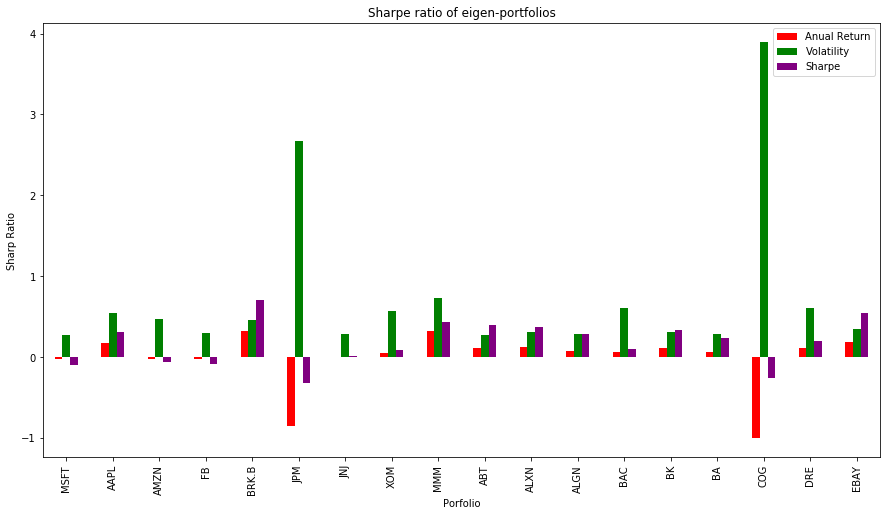

In [145]:
results = pd.DataFrame(data={'Anual Return': annualized_ret, 'Volatility': annualized_vol, 'Sharpe': sharpe_metric}
                       , index= stock_tickers)
#results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.plot(figsize=(15, 8)
             , color=["red", "green", "purple"]
            , title = "Sharpe ratio of eigen-portfolios"
            , kind="bar")

plt.xlabel("Porfolio")
plt.ylabel("Sharp Ratio")

plt.show()